In [1]:
import pandas as pd

In [2]:
# Dataframe (2D array): can think of as dict-like container for Series
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
# Series (1D array): one-dimensional labeled array 
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=["date"], index_col="date")
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
# Panel data -- time based data with one or more related variables
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=="MUMBAI"]
df.head()

# How do we know what variables exist in a DataFrame? Autocomplete?

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


               value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)


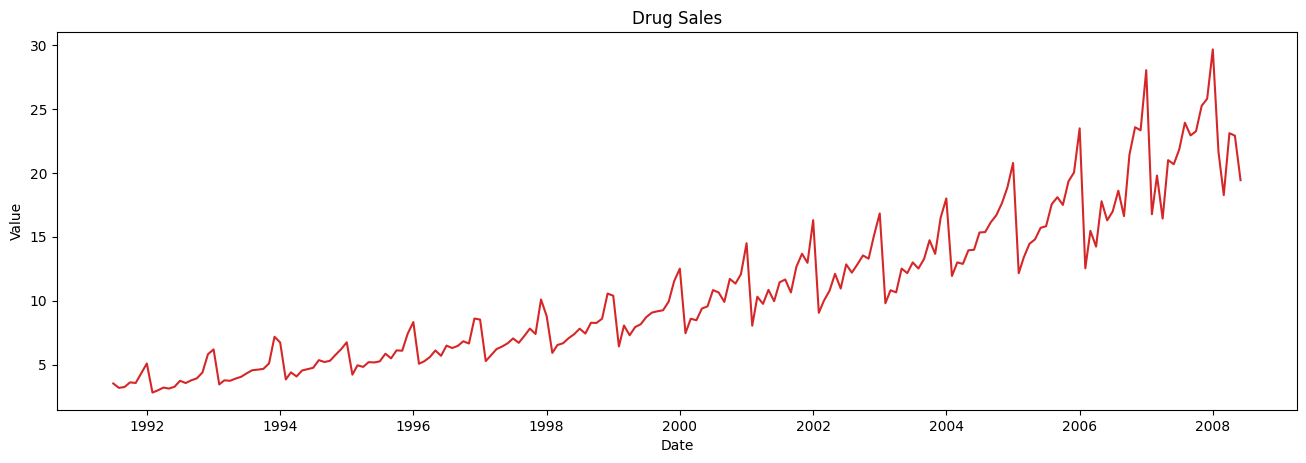

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
import matplotlib.pyplot as plt
# index_col specifies labels of index column to be the "date" column

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
print(df.head())
print(df.index)

def plot_df(df, x, y, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi) # What is dpi?
    plt.plot(x, y, color='tab:red') # Tab red?
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel) # GCA?
    plt.show()

plot_df(df, x=df.index, y=df.value, title="Drug Sales") # How did the years automatically come up vs. dates?

# Plotting, but now with DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df.head()

        date     value  year month
0 1991-07-01  3.526591  1991   Jul
1 1991-08-01  3.180891  1991   Aug
2 1991-09-01  3.252221  1991   Sep
3 1991-10-01  3.611003  1991   Oct
4 1991-11-01  3.565869  1991   Nov


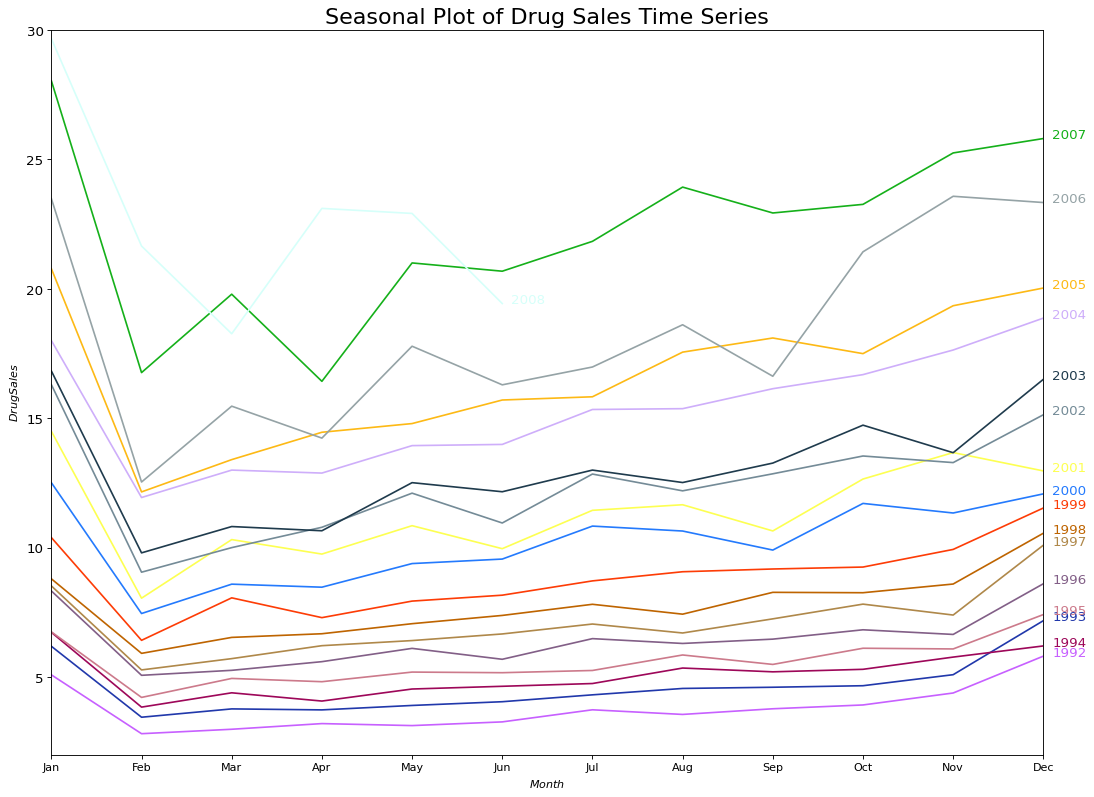

In [6]:
import numpy as np
np.random.seed(100)
import matplotlib as mpl
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True) # Has indices 0,1,2... again

df["year"] = [d.year for d in df.date] # Preparing new column
df["month"] = [d.strftime("%b") for d in df.date] # strftime is Python library for converting DateTime to string
years = df["year"].unique()
print(df.head())

# Pick years-size list of random colors from list of colors w/o replacement
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

plt.figure(figsize=(16,12), dpi=80)
for i,y in enumerate(years):
    if i > 0:
        # Plotting using labels of data frame as (x,y)
        plt.plot("month", "value", data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        # Plotting year y towards right of graph
        plt.text(df.loc[df.year==y, :].shape[0]-0.9, df.loc[df.year==y, "value"][-1:].values[0], y, fontsize=12, color=mycolors[i])
        
# Decoration
plt.gca().set(xlim=(0, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

          date      value  year month
6   1992-01-01   5.088335  1992   Jan
7   1992-02-01   2.814520  1992   Feb
8   1992-03-01   2.985811  1992   Mar
9   1992-04-01   3.204780  1992   Apr
10  1992-05-01   3.127578  1992   May
..         ...        ...   ...   ...
193 2007-08-01  23.930204  2007   Aug
194 2007-09-01  22.930357  2007   Sep
195 2007-10-01  23.263340  2007   Oct
196 2007-11-01  25.250030  2007   Nov
197 2007-12-01  25.806090  2007   Dec

[192 rows x 4 columns]


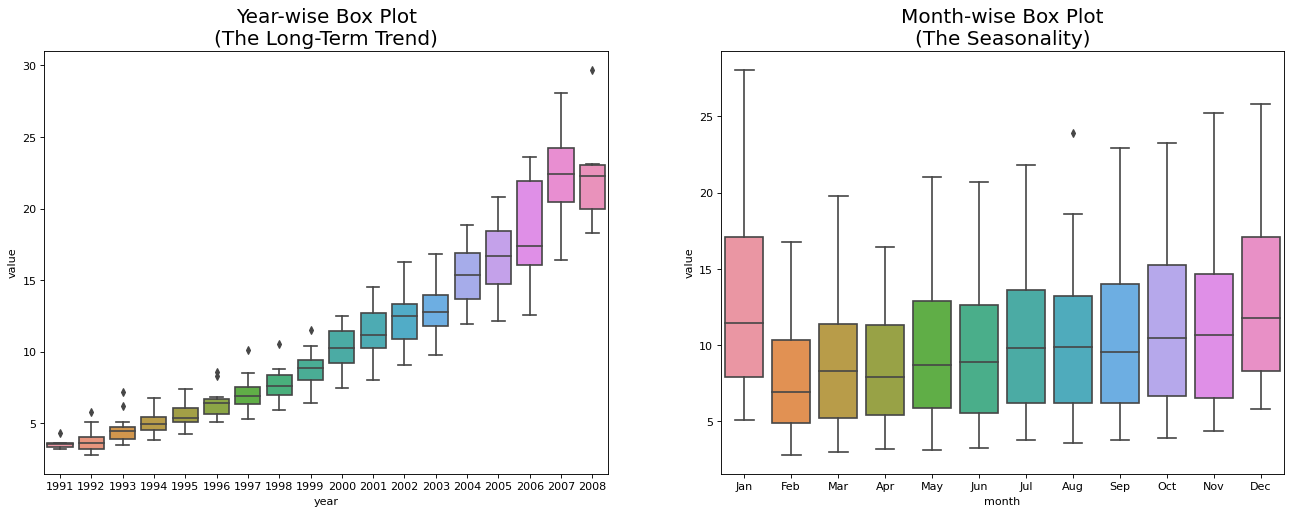

In [7]:
""" Critical for detrending """
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x="year", y="value", data=df, ax=axes[0])
sns.boxplot(x="month", y="value", data=df.loc[~df.year.isin([1991, 2008]), :], ax=axes[1])
# Excluding incomplete data for 1991 and 2008
print(df.loc[~df.year.isin([1991, 2008]), :]) 

axes[0].set_title('Year-wise Box Plot\n(The Long-Term Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()
             

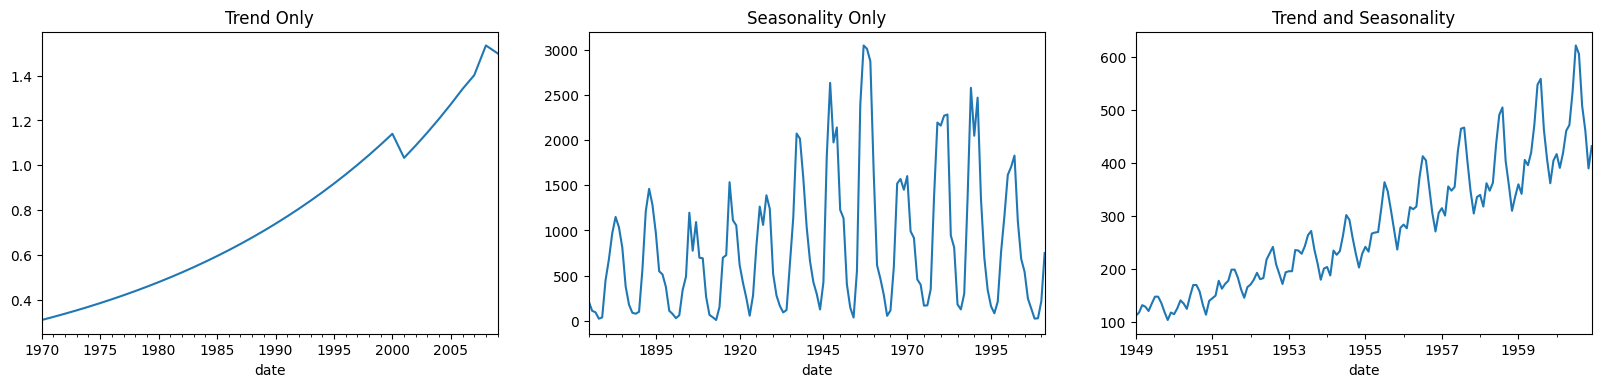

In [8]:
""" Patterns in Time Series """
# Basics: Base Level + Trend + Seasonality + Error 
# Cyclic vs. Seasonality (calendar year periodicity)

fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])
plt.show()

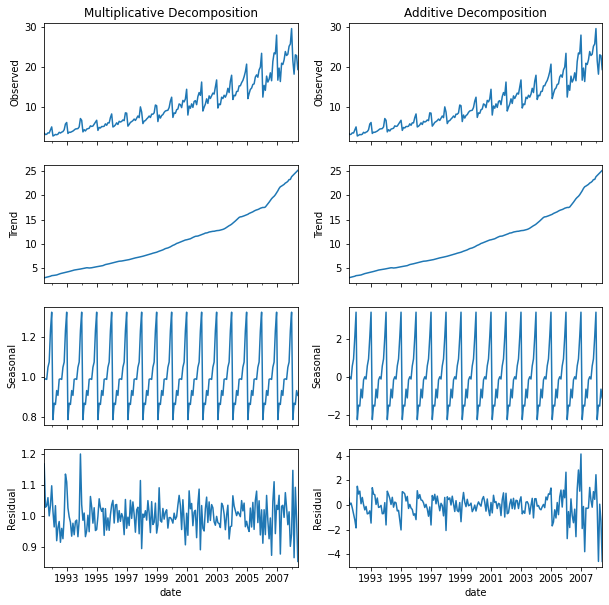

In [22]:
""" Decomposing Time Series into Components """
# Additive Time Series: Value = Base Level + Trend + Seasonality + Error
# Multiplicative Time Series: Value = Base Level x Trend x Seasonality x Error

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# Returns DecomposeResult with 4 Series attributes
mult_decomp = seasonal_decompose(df["value"], model="multiplicative", extrapolate_trend="freq")
add_decomp = seasonal_decompose(df["value"], model="additive", extrapolate_trend="freq")

def plot_decomposed(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

plt.rcParams.update({'figure.figsize': (10,10)})
fig, axes = plt.subplots(4, 2, sharex=True)
plot_decomposed(mult_decomp, axes[:,0])
axes[0, 0].set_title("Multiplicative Decomposition")
axes[0, 1].set_title("Additive Decomposition")
plot_decomposed(add_decomp, axes[:,1])
plt.show()

In [34]:
# Reconstructing original time series

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
reconstructed_vals = df_reconstructed.seas * df_reconstructed.trend * df_reconstructed.resid
df_reconstructed = pd.concat([df_reconstructed, reconstructed_vals], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values', 'reconstructed']
df_reconstructed.head()

,seas,trend,resid,actual_values,reconstructed
date,,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869,3.565869


### <ins>On the Importance of Stationarity:</ins> 

- Statistical properties (mean, variance, autocorrelation) of time series do not change over time
- Values are not a funciton of time, but do change with time
- No seasonal effects
- **Goal:** transform any time series into stationary time series

--- 

- "The WAY that a time series changes over time does not change" -- analogous to linear function: non-zero slope, but zero second derivative.

- Since the WAY that Stationary time series change over time is predictable, they are often easier to analyze. The results are more reliable.

- This is because autoregressive forecasters are basically linear combinations of values at previous time-steps (lags). We want to remove autocorrelation (correlation of time series with lag). Stationarizing a series removes such autocorrelation. 

---

#### Methods:

1. Differencing the series: val_(t+1) - val_(t). May need multiple iterations

---

#### Testing for Stationarity:

- Unit Root Tests: ADH, KPSS, PP Test
- ADH: 
    - Null hypothesis is that the trend is non-stationary
    - If p-value (output) < 0.05, then trend *is* stationary
- KPSS (Trend Stationarity):
    - Null hypothesis is that trend *is stationary*
    - If p-value (output) < 0.05, then trend *is **not** stationary*
   